# Исследование надёжности заёмщиков

**Цели и задачи проекта:** Заказчик — кредитный отдел банка. Требуется определить, влияет ли семейное положение или количество детей, а также ежемесячный доход клиента или цель кредита на факт его погашения в срок. Результаты исследования будут учтены при построении модели *кредитного скоринга* — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

**Входные данные:** статистика банка о платёжеспособности клиентов предоставлена в виде файла формата csv. Статистика дает описание возраста клиента, его пола, семейного положения и информацию о наличии детей. Также имеются данные об образовании клиента, трудовом стаже и цели займа. 

**Обозначения категорий исходных данных:**
* *children* — количество детей в семье
* *days_employed* — общий трудовой стаж в днях
* *dob_years* — возраст клиента в годах
* *education* — уровень образования клиента
* *education_id* — идентификатор уровня образования
* *family_status* — семейное положение
* *family_status_id* — идентификатор семейного положения
* *gender* — пол клиента (F - женский, M - мужской)
* *income_type* — тип занятости
* *debt* — имел ли задолженность по возврату кредитов (0 - отсутствует, 1 - имеется)
* *total_income* — ежемесячный доход
* *purpose* — цель получения кредита

**План работы** над проектом включает в себя выполнение следующих шагов:
* *Импорт исходных данных и библиотек Python.* На этом этапе получаем общую информацию об имеющейся у нас в распоряжении информации, типах данных, их полноте и правильности представления.
* *Предварительная обработка данных.* В этой части работы обращаем пристальное внимание на недостатки исходных данных и их релевантность: обрабатываем пропуски в данных, преобразуем данные в верный тип, проверяем их на присутствие ошибочных значений и обрабатываем дубликаты с целью исключения искажений в результатах. Организация категорий внутри имеющихся групп данных позволяет нам подготовить информацию о цели кредита, ежемесячном доходе и наличию детеЙ к детальному анализу.  
* *Анализ данных.* Данный этап позволяет ответить на вопросы, каким образом та или иная характеристика клиента может оказать влияние на его/ее задолженность по кредиту. Указанные зависимости отражаются в сводных таблицах по результатам группировки, подсчету и аггрегирования различных данных. Анализ позволяет критически оценить полученные результаты и оценить их достоверность.
* *Формулирование общиего вывода*. На заключительном этапе приводится сумма выводов и рекомендаций по каждой части выполненного проекта. В общем выводе по проекту мы отразим ключевые рекомендации для заемщика о роли каждого из факторов на возврат кредита.

<h1>Содержание проекта<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Импорт-данных-и-изучение-общей-информации" data-toc-modified-id="Импорт-данных-и-изучение-общей-информации-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Импорт данных и изучение общей информации</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обработка пропусков</a></span><ul class="toc-item"><li><span><a href="#Подсчет-количества-строк-с-отсутствующими-данными" data-toc-modified-id="Подсчет-количества-строк-с-отсутствующими-данными-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Подсчет количества строк с отсутствующими данными</a></span></li><li><span><a href="#Подсчет-доли-пропусков" data-toc-modified-id="Подсчет-доли-пропусков-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Подсчет доли пропусков</a></span></li></ul></li><li><span><a href="#Обработка-некорректных-значений" data-toc-modified-id="Обработка-некорректных-значений-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обработка некорректных значений</a></span><ul class="toc-item"><li><span><a href="#Проверка-данных-о-численности-детей-на-наличие-некорректных-значений" data-toc-modified-id="Проверка-данных-о-численности-детей-на-наличие-некорректных-значений-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Проверка данных о численности детей на наличие некорректных значений</a></span></li><li><span><a href="#Проверка-данных-о-возрасте-заявителей-на-наличие-некорректных-значений" data-toc-modified-id="Проверка-данных-о-возрасте-заявителей-на-наличие-некорректных-значений-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Проверка данных о возрасте заявителей на наличие некорректных значений</a></span></li><li><span><a href="#Проверка-данных-о-стаже-работе-заявителей-на-наличие-некорректных-значений" data-toc-modified-id="Проверка-данных-о-стаже-работе-заявителей-на-наличие-некорректных-значений-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Проверка данных о стаже работе заявителей на наличие некорректных значений</a></span></li></ul></li><li><span><a href="#Замена-пропусков-и-типа-данных" data-toc-modified-id="Замена-пропусков-и-типа-данных-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Замена пропусков и типа данных</a></span></li><li><span><a href="#Обработка-дубликатов" data-toc-modified-id="Обработка-дубликатов-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Обработка дубликатов</a></span><ul class="toc-item"><li><span><a href="#Выявление-и-обработка-дубликатов-в-сведениях-об-образовании" data-toc-modified-id="Выявление-и-обработка-дубликатов-в-сведениях-об-образовании-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Выявление и обработка дубликатов в сведениях об образовании</a></span></li><li><span><a href="#Выявление-и-обработка-дубликатов-в-сведениях-о-семейном-положении" data-toc-modified-id="Выявление-и-обработка-дубликатов-в-сведениях-о-семейном-положении-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Выявление и обработка дубликатов в сведениях о семейном положении</a></span></li><li><span><a href="#Выявление-дубликатов-в-сведениях-о-поле-клиента" data-toc-modified-id="Выявление-дубликатов-в-сведениях-о-поле-клиента-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>Выявление дубликатов в сведениях о поле клиента</a></span></li><li><span><a href="#Выявление-дубликатов-в-сведениях-о-типе-занятости" data-toc-modified-id="Выявление-дубликатов-в-сведениях-о-типе-занятости-2.4.4"><span class="toc-item-num">2.4.4&nbsp;&nbsp;</span>Выявление дубликатов в сведениях о типе занятости</a></span></li><li><span><a href="#Выявление-дубликатов-в-сведениях-о-цели-получения-кредита" data-toc-modified-id="Выявление-дубликатов-в-сведениях-о-цели-получения-кредита-2.4.5"><span class="toc-item-num">2.4.5&nbsp;&nbsp;</span>Выявление дубликатов в сведениях о цели получения кредита</a></span></li></ul></li><li><span><a href="#Лемматизация" data-toc-modified-id="Лемматизация-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Лемматизация</a></span></li><li><span><a href="#Категоризация-данных" data-toc-modified-id="Категоризация-данных-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Категоризация данных</a></span><ul class="toc-item"><li><span><a href="#Категоризация-данных-по-цели-получения-кредита" data-toc-modified-id="Категоризация-данных-по-цели-получения-кредита-2.6.1"><span class="toc-item-num">2.6.1&nbsp;&nbsp;</span>Категоризация данных по цели получения кредита</a></span></li><li><span><a href="#Категоризация-данных-по-наличию-детей" data-toc-modified-id="Категоризация-данных-по-наличию-детей-2.6.2"><span class="toc-item-num">2.6.2&nbsp;&nbsp;</span>Категоризация данных по наличию детей</a></span></li><li><span><a href="#Категоризация-данных-по-ежемесячному-доходу" data-toc-modified-id="Категоризация-данных-по-ежемесячному-доходу-2.6.3"><span class="toc-item-num">2.6.3&nbsp;&nbsp;</span>Категоризация данных по ежемесячному доходу</a></span></li></ul></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Зависимость-между-наличием-детей-и-возвратом-кредита-в-срок" data-toc-modified-id="Зависимость-между-наличием-детей-и-возвратом-кредита-в-срок-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Зависимость между наличием детей и возвратом кредита в срок</a></span></li><li><span><a href="#Зависимость-между-семейным-положением-и-возвратом-кредита-в-срок" data-toc-modified-id="Зависимость-между-семейным-положением-и-возвратом-кредита-в-срок-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Зависимость между семейным положением и возвратом кредита в срок</a></span></li><li><span><a href="#Зависимость-между-уровнем-дохода-и-возвратом-кредита-в-срок" data-toc-modified-id="Зависимость-между-уровнем-дохода-и-возвратом-кредита-в-срок-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Зависимость между уровнем дохода и возвратом кредита в срок</a></span></li><li><span><a href="#Зависимость-между-целями-и-возвратом-кредита-в-срок" data-toc-modified-id="Зависимость-между-целями-и-возвратом-кредита-в-срок-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Зависимость между целями и возвратом кредита в срок</a></span></li><li><span><a href="#Зависимость-между-полом-клиента-и-возвратом-кредита-в-срок" data-toc-modified-id="Зависимость-между-полом-клиента-и-возвратом-кредита-в-срок-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Зависимость между полом клиента и возвратом кредита в срок</a></span></li></ul></li><li><span><a href="#Общие-выводы" data-toc-modified-id="Общие-выводы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общие выводы</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Импорт данных и изучение общей информации

In [1]:
import pandas as pd                        
import numpy as np
import matplotlib.pyplot as plt
import math

# импорт библиотек для лемматизации
from pymystem3 import Mystem
from collections import Counter

# константы, использующиеся в проекте
START_JOB_AGE = 14 # минимальный возраст для заключения трудового соглашения
DAYS_PER_YEAR = 365 # количество дней в году, без учета высокосного года

In [2]:
df = pd.read_csv('data.csv')     
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [3]:
df.info()                                   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [4]:
number_rows = len(df)

**Промежуточные выводы:**

* Данные файла формата csv представлены в требуемой кодировке и не имеют нечитаемых символов <br>
* Названия колонок представлены в едином формате и не требуют переименования <br>
* В датафрейме 21525 строк и 12 колонок
* В колонках <i>days_employed</i> и <i>total_income</i> содержатся пропуски
* Типы данных колонок <i>days_employed</i> и <i>total_income</i> требуют преобразования из <i>float64</i> в <i>int64</i> для корректного представления данных
* Предварительный анализ датафрейма говорит о некорректном представлении рабочего стажа (присутствует знак '-') и наличии артефактов (например, рабочий стаж заемщика равен 340266 дням, что составляет 932 года). Как следствие, требуется провести предобработку данных.   

## Предобработка данных

### Обработка пропусков

#### Подсчет количества строк с отсутствующими данными

In [5]:
df.isnull().sum()                          

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

#### Подсчет доли пропусков

In [6]:
df.isna().mean()

children            0.000000
days_employed       0.100999
dob_years           0.000000
education           0.000000
education_id        0.000000
family_status       0.000000
family_status_id    0.000000
gender              0.000000
income_type         0.000000
debt                0.000000
total_income        0.100999
purpose             0.000000
dtype: float64

Процент пропущенных данные о стаже работы и ежемесячном доходе составляет 10.1% от общей выборки. Удаление строк с пропущенными данными может привести к серьезному искажению результатов.

### Обработка некорректных значений

#### Проверка данных о численности детей на наличие некорректных значений

In [7]:
df['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

In [8]:
negative_values_kids = df.loc[df.loc[:, 'children'] < 0]['children'].count()
suspicious_values_kids = df.loc[df.loc[:, 'children'] > 15]['children'].count()
total_wrong_values_kids = negative_values_kids + suspicious_values_kids
print('Количество ошибочных данных о численности детей:', total_wrong_values_kids,
      ', составляющих {:.2%} от общей выборки'.format(total_wrong_values_kids/number_rows))

Количество ошибочных данных о численности детей: 123 , составляющих 0.57% от общей выборки


Общее число некорректных данных по численности детей не оказывает значительного влияния в случае удаления ошибочных строк. 

Тем не менее, с использованием функции *children chheck* отрицательные значения возраста детей были преобразованы в положительные, после чего была проведена дополнительная проверка на наличие в списке более 15-ти детей (число выбрано из-за возможности присутствия данных о многодетных семьях). В случае превышения этого лимита, используется алгоритм удаления строк с ошибочными данными.   

In [9]:
def children_check(number):
    """
    Функция выполняет универсальную проверку на наличие отрицательных и возможных некорректных
    значений в численности детей.
    """
    if number < 0:
        return (number / -1)
        if number > 15:
            return 'mistake'
    if number >= 0 and number < 15:
        return number
    if number > 15:
        return 'mistake'
df['children'] = df['children'].apply(children_check)

df.drop(df[df.children == 'mistake'].index, inplace = True)

In [10]:
# проверка правильности обновленных данных по количеству детей
df['children'] = df['children'].astype(int)
df['children'].value_counts()

0    14149
1     4865
2     2055
3      330
4       41
5        9
Name: children, dtype: int64

#### Проверка данных о возрасте заявителей на наличие некорректных значений

In [11]:
df['dob_years'].value_counts().tail(11)

0     100
68     99
69     84
70     65
71     58
20     51
72     33
19     14
73      8
74      6
75      1
Name: dob_years, dtype: int64

Проверка уникальных данных о возрасте показала, что у 100 заемщиков в качестве возраста указано значение 0, что можно рассматривать либо как нежелание указывать свой возраст или как ошибку заполнения.

#### Проверка данных о стаже работе заявителей на наличие некорректных значений

In [12]:
# Вычисление абсолютных значений для столбца days_employed
df['days_employed'] = df['days_employed'].abs()

In [13]:
# Выявление артефактов в данных о стаже работы
df['years_employed_check'] = (df['dob_years'] - START_JOB_AGE) - (df['days_employed']/DAYS_PER_YEAR)

In [14]:
# выявление отрицательных значений, указывающих на артефакты
artefacts_count = df.loc[df.loc[:, 'years_employed_check'] < 0]['years_employed_check'].count()

In [15]:
print('Количество ошибочных данных о стаже работы:', artefacts_count,
      ', составляющих {:.1%} от общей выборки'.format(artefacts_count/number_rows))

Количество ошибочных данных о стаже работы: 3527 , составляющих 16.4% от общей выборки


К артефактам были отнесены значения стажа работы (в годах), превышающие возраст клиента за минусом 14 лет (выбранный минимальный возраст для заключения трудового договора).

**Промежуточные выводы:**

* Количество пропусков (стаж работы и ежемесячный доход) и количество ошибочных данных о стаже работы в выборке составляет 10,1% и 16.4% соответственно.
* Проверка уникальных данных о возрасте показала, что у 101 заемщика в качестве возраста указано значение 0, что можно рассматривать либо как нежелание указывать свой возраст или как ошибку заполнения.
* Возможным вариантом дальнейшей предобработки таблицы является либо удаление из таблицы артефактов, касающихся стажа работы из-за невозможности достоверно установить точные значения, либо при их сохранении (для увеличения данных выборки) исключить фактор стажа работы из анализа. При выполнении проекта был выбран второй вариант, т.к. он в большей степени соответствует поставленному заданию.

### Замена пропусков и типа данных

Общее число пропущенных значений ежемесячного дохода (2174) составляет значительную часть от общей выборки. С целью сохранения большего числа данных для анализа, пропуски были заменены на медианное значение, полученное из имеющихся данных о доходах.

In [16]:
total_income_median = df['total_income'].median()
print('Медианное значение ежемесячного дохода составляет:', total_income_median)
df['total_income'] = df['total_income'].fillna(total_income_median)

Медианное значение ежемесячного дохода составляет: 145020.80127962783


Пропущенные значения о стаже работы были оставлены в выборке, т.к. данные этой колонки не используются в анализе по условиям проекта. Их удаление привело бы к значительному уменьшению данных для анализа по другим показателям. 

Данные о ежемесячном доходе и стаже работы* требуется преобразовать в целочисленный тип данных. Это позволяет представить их в более наглядной форме. Так как исходный тип данных был float64 (числа с плавающей точкой), то использовался метод astype( ), в отличие от to_numeric(), который используется для преобразования из строкового типа (object / str) в числовой (float).

*- преобразование не проводилось из-за намеренного сохранения NaN в этой колонке

In [17]:
df['total_income'] = df['total_income'].astype('int')

### Обработка дубликатов

На первоначальном этапе оцениваем содержит ли датафрейм дубликаты и к какому типу они относятся.

#### Выявление и обработка дубликатов в сведениях об образовании

Выявим уникальные значения для столбцов с текстовыми данными и проведем подсчет с какой частотой они встречаются:

In [18]:
df['education'].value_counts()

среднее                13698
высшее                  4706
СРЕДНЕЕ                  770
Среднее                  705
неоконченное высшее      666
ВЫСШЕЕ                   272
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
УЧЕНАЯ СТЕПЕНЬ             1
Ученая степень             1
Name: education, dtype: int64

Данные столбца 'образование' содержат дубликаты, возникшие из-за использования смешанного регистра. Приводим данные столбца 'образование' к нижнему регистру, что позволит исключить дубликаты:

In [19]:
df['education'] = df['education'].str.lower()
df['education'].value_counts()

среднее                15173
высшее                  5246
неоконченное высшее      742
начальное                282
ученая степень             6
Name: education, dtype: int64

In [20]:
duplicates_amount = df.duplicated().sum()
print('Количество дубликатов в данных:', duplicates_amount)

Количество дубликатов в данных: 71


Удалим одинаковые строки, встречающиеся в датафрейме:

In [21]:
df = df.drop_duplicates()

In [22]:
number_rows_new = len(df)
print('Количество строк в датафрейме после удаления дубликатов:', number_rows_new)

Количество строк в датафрейме после удаления дубликатов: 21378


#### Выявление и обработка дубликатов в сведениях о семейном положении

Определение уникальных значений:

In [23]:
df['family_status'].unique()

array(['женат / замужем', 'гражданский брак', 'вдовец / вдова',
       'в разводе', 'Не женат / не замужем'], dtype=object)

Сведения о семейном положении заемщика не содержат дубликатов, но рекомендуется привести их к нижнему регистру.

In [24]:
df['family_status'] = df['family_status'].str.lower()
df['family_status'].value_counts(normalize = True)

женат / замужем          0.574890
гражданский брак         0.193610
не женат / не замужем    0.131023
в разводе                0.055805
вдовец / вдова           0.044672
Name: family_status, dtype: float64

#### Выявление дубликатов в сведениях о поле клиента

In [25]:
df['gender'].unique()

array(['F', 'M', 'XNA'], dtype=object)

In [26]:
# Удаление неинформативных данных о поле клиента
df.drop(df[df.gender == 'XNA'].index, inplace=True)

Сведения о поле клиента не содержат дубликатов.

#### Выявление дубликатов в сведениях о типе занятости

In [27]:
df['income_type'].unique()

array(['сотрудник', 'пенсионер', 'компаньон', 'госслужащий',
       'безработный', 'предприниматель', 'студент', 'в декрете'],
      dtype=object)

Сведения о типе занятости не содержат дубликатов.

#### Выявление дубликатов в сведениях о цели получения кредита

In [28]:
df['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Сведения о типе занятости содержат дублирующую информацию, вызванную использованием слов (словосочетаний) в разных формах.<br>
Рекомендуется использовать методы стемминга и/или лемматизации для работы с такого рода дубликатами.

**Промежуточные выводы:**

* Данные содержат дубликаты двух типов: идентичная информация, отличающаяся регистром, и данные, представленные использованием слов (словосочетаний) в разных формах.
* Дубликаты первого типа были обработаны методом str.lower(), позволяющим привести их к нижнему регистру, тем самым исключив дублирующие значения.
* Дубликаты второго типа требуется исключить методом лемматизации, путем автоматического приведения слова к его словарной форме.

### Лемматизация

Для поиска дубликатов в указанных заявителями целями на получение кредита проводим лемматизацию с использованием библиотеки с функцией лемматизации на русском языке — pymystem3, разработаной в Яндексе:

In [29]:
m = Mystem()
df['purpose']=df['purpose'].apply(m.lemmatize)

In [30]:
print(df['purpose'].value_counts())

[автомобиль, \n]                                          970
[свадьба, \n]                                             790
[на,  , проведение,  , свадьба, \n]                       764
[сыграть,  , свадьба, \n]                                 761
[операция,  , с,  , недвижимость, \n]                     674
[покупка,  , коммерческий,  , недвижимость, \n]           658
[покупка,  , жилье,  , для,  , сдача, \n]                 650
[операция,  , с,  , жилье, \n]                            648
[операция,  , с,  , коммерческий,  , недвижимость, \n]    646
[покупка,  , жилье, \n]                                   643
[жилье, \n]                                               642
[покупка,  , жилье,  , для,  , семья, \n]                 637
[недвижимость, \n]                                        632
[строительство,  , собственный,  , недвижимость, \n]      629
[операция,  , со,  , свой,  , недвижимость, \n]           626
[строительство,  , жилой,  , недвижимость, \n]            623
[покупка

In [31]:
lemma = df['purpose'].sum()

In [32]:
print(Counter(lemma))

Counter({' ': 33445, '\n': 21377, 'недвижимость': 6329, 'покупка': 5877, 'жилье': 4445, 'автомобиль': 4290, 'образование': 3998, 'с': 2905, 'операция': 2594, 'свадьба': 2315, 'свой': 2226, 'на': 2211, 'строительство': 1871, 'высокий': 1368, 'получение': 1311, 'коммерческий': 1304, 'для': 1287, 'жилой': 1227, 'сделка': 937, 'заниматься': 904, 'дополнительный': 902, 'проведение': 764, 'сыграть': 761, 'сдача': 650, 'семья': 637, 'собственный': 629, 'со': 626, 'ремонт': 605, 'подержанный': 482, 'подержать': 472, 'приобретение': 461, 'профильный': 434})


Из полученных данных о целях получения кредита можно выделить 5 основных категорий: автомобиль, свадьба, недвижимость, образование, ремонт. Категория недвижимости включает в себя жилую и коммерческую недвижимость, но разделить эти компоненты из имеющихся данных можно только с потерей информации, т.к. в лемматизированных данных отдельно присутствует общая категория "недвижимость" без указания точной цели по использованию кредита.  

### Категоризация данных

#### Категоризация данных по цели получения кредита

Используя данные о цели кредита после лемматизации, разделим их на выбранные нами категории и определим их частоту:

In [33]:
def purpose_condition(purpose):
        
    """ Функция категоризирует заемщиков по цели кредита """
    
    if 'ремонт' in purpose:
        return 'ремонт'
    if  ('недвижимость' in purpose) or ('жилье' in purpose):
        return 'недвижимость'
    if 'автомобиль' in purpose:
        return 'автомобиль'
    if 'образование' in purpose:
        return 'образование'
    if 'свадьба' in purpose:
        return 'свадьба'

In [34]:
df['purpose_category'] = df['purpose'].apply(purpose_condition)
df['purpose_category'].value_counts(normalize = True)

недвижимость    0.475698
автомобиль      0.200683
образование     0.187023
свадьба         0.108294
ремонт          0.028301
Name: purpose_category, dtype: float64

#### Категоризация данных по наличию детей

Разделим заемщиков на две категории по наличию и отсутствию детей и выведем численность заемщиков по этому признаку:

In [35]:
def children_condition(number):
    
    """ Функция категоризирует заемщиков по наличию детей """
     
    if number > 0:
        return 'есть дети '
    return 'нет детей'

df['children_category'] = df['children'].apply(children_condition)

df['children_category'].value_counts(normalize = True)

нет детей     0.65912
есть дети     0.34088
Name: children_category, dtype: float64

Дополнительно категоризируем заемщиков на три группы по численности детей. Первая группа не имеет детей, у второй группы - 1-ребенок, у третьей группы есть более одного ребенка: 

In [36]:
def children_condition2(number):

    """ Функция категоризирует заемщиков по числу детей """
    
    if number == 0:
        return 'нет детей'
    if number == 1:
        return '1 ребенок'
    if number > 1:
        return '> 1-го ребенка'

In [37]:
df['children_category2'] = df['children'].apply(children_condition2)
df['children_category2'].value_counts(normalize = True)

нет детей         0.659120
1 ребенок         0.227113
> 1-го ребенка    0.113767
Name: children_category2, dtype: float64

#### Категоризация данных по ежемесячному доходу

Определим разброс значений по ежемесячному доходу заеемщиков:

In [38]:
df['total_income'].describe()

count    2.137700e+04
mean     1.652216e+05
std      9.809310e+04
min      2.066700e+04
25%      1.075230e+05
50%      1.450200e+05
75%      1.957830e+05
max      2.265604e+06
Name: total_income, dtype: float64

Определим оптимальное количество интервалов (карманов) по формуле Стерджесса:

In [39]:
n = 1 + (3.322 * (math.log10(number_rows_new)))
int(n)

15

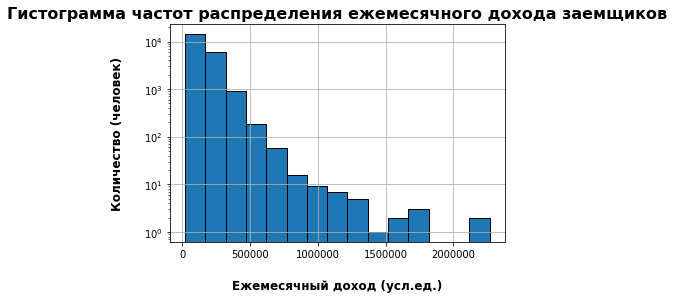

In [40]:
histogram = df['total_income'].hist(bins = 15, log = True, edgecolor='black')

title = histogram.set_title('Гистограмма частот распределения ежемесячного дохода заемщиков', size=16, weight='bold')
x_lable = histogram.set_xlabel('Ежемесячный доход (усл.ед.)', labelpad=20, weight='bold', size=12)
y_lable = histogram.set_ylabel('Количество (человек)', labelpad=20, weight='bold', size=12)

Ось Y представлена логарифмической шкалой, которая позволяет отразить на гистограмме количество заемщиков, если оно небольшое.

В связи с тем, что имеется значительный разброс по ежемесячному доходу с увеличением которого уменьшается выборка, для дальнейшего анализа выделим 5 условных категорий дохода.

In [41]:
df['total_income_category'] = pd.qcut(df['total_income'], 5)
df['total_income_category'].value_counts()

(214561.2, 2265604.0]    4276
(20666.999, 98522.8]     4276
(156436.4, 214561.2]     4275
(135423.2, 156436.4]     4275
(98522.8, 135423.2]      4275
Name: total_income_category, dtype: int64

В дальнейшем, для удобства будем использовать следующие обозначения категорий ежемесячного дохода (усл.ед.):<br>
низкий:         20666.999 - 98661.6 <br>
ниже среднего:  98661.6 - 135668.0 <br>
средний:        135668.0 - 156177.8 <br>
выше среднего:  156177.8 - 214253.4 <br>
высокий:        214253.4 - 2265604.0 <br>

## Анализ данных

### Зависимость между наличием детей и возвратом кредита в срок

In [42]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.groupby('children_category')['debt']  \
    .agg(['count','sum', 'mean'])  \
    .sort_values(by = 'mean', ascending = False)  \
    .rename(columns = {'mean': 'debt_fraction'})  \

,count,sum,debt_fraction
children_category,,,
есть дети,7287,670,0.092
нет детей,14090,1063,0.075


Из результатов анализа следует, что процент задолженности у заемщиков с детьми составляет около 9,2%. Процент задолженности у заемщиков без детей равен 7,5%. 

С учетом доверительного интервала в 95% процент задолженности у заемщиков с детьми составляет 9,2 ± 0,6%, 
без детей - 7,5 ± 0,6%. Вывод о том, что заемщики без детей имеют меньшую задолженность перед банком - верен.  

In [43]:
df.groupby('children')['debt']  \
    .agg(['count','sum', 'mean'])  \
    .sort_values(by = 'mean', ascending = False)  \
    .rename(columns = {'mean': 'debt_fraction'})

,count,sum,debt_fraction
children,,,
4,41,4,0.098
2,2052,194,0.095
1,4855,445,0.092
3,330,27,0.082
0,14090,1063,0.075
5,9,0,0.000


С учетом доверительного интервала в 95%, процент задолженности у заемщиков с: 
* 1-м ребенком: 9,2 ± 0,6%
* 2-я детьми: 9,5 ± 1,2%
* 3-я детьми: 8,6 ± 3,0%
* 4-я детьми: 13,2 ± 9,3%

Полученный результат показывает, что заемщики с 1-2 детьми имеют схожие результаты по задолженности. У заемщиков с 3-4 детьми из-за меньшей выборки увеличивается стандартное отклонение, что не позволяет сделать достоверный вывод о их влиянии на задолженность по сравнению с другими группами. Проведенный тест на критерий хи-квадрат указывает на одинаковое влияние численности детей (>= 1) на задолженность перед банком.



In [44]:
df.groupby('children_category2')['debt']  \
    .agg(['count','sum', 'mean'])  \
    .sort_values(by = 'mean', ascending = False)  \
    .rename(columns = {'mean': 'debt_fraction'})

,count,sum,debt_fraction
children_category2,,,
> 1-го ребенка,2432,225,0.093
1 ребенок,4855,445,0.092
нет детей,14090,1063,0.075


Данные по численности детей, разделенные на 3 категории указыват на то, что увеличение численности детей в семье (2-ой ребенок и более) незначительно влияет на задолженность по кредиту. Следует отметить, что для окончательного заключения требуется большая выборка по клиентам, имеющим 2-х и более детей. Эта выборка должна быть по объему сопоставима с выборкой для бездетных заемщиков. 

### Зависимость между семейным положением и возвратом кредита в срок

In [45]:
df.groupby('family_status')['debt']  \
    .agg(['count','sum', 'mean'])  \
    .sort_values(by = 'mean', ascending = False)  \
    .rename(columns = {'mean': 'debt_fraction'})

,count,sum,debt_fraction
family_status,,,
не женат / не замужем,2801,273,0.097
гражданский брак,4138,385,0.093
женат / замужем,12290,928,0.076
в разводе,1193,84,0.070
вдовец / вдова,955,63,0.066


Предварительный анализ показывает, что максимальная задолженность по кредитам наблюдается у неженатых (незамужних) людей - 9,7%, а также у людей, находящихся в гражданском браке - 9,3%.

### Зависимость между уровнем дохода и возвратом кредита в срок

In [46]:
df.groupby('total_income_category')['debt']  \
    .agg(['count','sum', 'mean'])  \
    .sort_values(by = 'mean', ascending = False)  \
    .rename(columns = {'mean': 'debt_fraction'})

,count,sum,debt_fraction
total_income_category,,,
"(135423.2, 156436.4]",4275,371,0.087
"(156436.4, 214561.2]",4275,367,0.086
"(98522.8, 135423.2]",4275,352,0.082
"(20666.999, 98522.8]",4276,344,0.080
"(214561.2, 2265604.0]",4276,299,0.070


Предварительный анализ показывает, что максимальная задолженность по кредитам наблюдается у категорий заемщиков со средним доходом (от 135 до 156 тыс.) и доходом выше среднего (от 156 до 215 тыс.). 

### Зависимость между целями и возвратом кредита в срок

In [47]:
df.groupby('purpose_category')['debt']  \
    .agg(['count','sum', 'mean'])  \
    .sort_values(by = 'mean', ascending = False)  \
    .rename(columns = {'mean': 'debt_fraction'})

,count,sum,debt_fraction
purpose_category,,,
автомобиль,4290,401,0.093
образование,3998,369,0.092
свадьба,2315,183,0.079
недвижимость,10169,745,0.073
ремонт,605,35,0.058


Предварительный анализ показывает, что максимальная задолженность по кредитам наблюдается у заемщиков, ставящих целью приобрести автомобиль (9,3%) или оплатить образование (9,2%).

### Зависимость между полом клиента и возвратом кредита в срок

Определим как влияет пол клиента на задолженность перед банком. В качестве примера для сравнения возьмем следующую категорию заемщика: неженатый мужчина (незамужняя женщина) с разным уровнем ежемесячного дохода.

In [48]:
data_pivot = df.query('family_status_id == 4') \
    .pivot_table(index=['total_income_category'], columns='gender', values='debt', aggfunc='mean')
data_pivot

gender,F,M
total_income_category,,
"(20666.999, 98522.8]",0.052,0.161
"(98522.8, 135423.2]",0.062,0.145
"(135423.2, 156436.4]",0.087,0.102
"(156436.4, 214561.2]",0.089,0.181
"(214561.2, 2265604.0]",0.054,0.134


Результаты показывают, что незамужние женщины имеют меньшую задолженность перед банком, чем неженатые мужчины. Это характерно для всех уровней дохода.

Определим также как влияет образование для выбранной группы клиентов на задолженность по кредиту:

In [49]:
data_pivot = df.query('family_status_id == 4') \
    .pivot_table(index=['education'], columns='gender', values='debt', aggfunc='mean')
data_pivot

gender,F,M
education,,
высшее,0.036,0.096
начальное,0.077,0.095
неоконченное высшее,0.078,0.111
среднее,0.083,0.170
ученая степень,nan,0.000


Из таблицы видно, что вне зависимости от образования в выбранной категории заемщиков, незамужние женщины имеют меньшую задолженность по кредиту, чем холостые мужчины. В этой категории наименьшую задолженность имеют люди с высшим образованием.

## Общие выводы

Проанализировав полученные данные можно сделать следующие выводы:

* **Исходные данные** имеют ряд существенных недостатков, устранение которых на этапе сбора информации может значительно повысить точность дальнейшего анализа. Среди них: пропущенные данные о стаже работы и ежемесячном доходе составляют 10.1% от общей выборки. Кроме того, количество ошибочных данных о стаже работы клиентов составляет 16.4% от первоначальной выборки. В исходной информации присутствуют дубликаты. Несмотря на то, что они были удалены на этапе предварительной обработки данных, рекомендуется предусмотреть в форме ввода данных (а) использование единого нижнего регистра при вводе информации и (б) выпадающего меню для выбора цели кредита.


* **Категоризация данных** позволила выделить пять основных целей для использования кредита: недвижимость (46,7%), приобретение автомобиля (20,1%), образование (18,7%), свадьба (10,8%) и ремонт (2,8%). Данные показывают, что у 66% заемщиков нет детей. Были выделены пять категорий заемщиков в зависимости от ежемесячного дохода (в усл.ед.): низкий (20667 - 98662), ниже среднего (98662 - 135669), средний (135668 - 156178), выше среднего (156178 - 214253) и высокий (214253 - 2265604).


* **Анализ данных** позволил выявить следующие закономерности:
- к наименьшей задолженности в 7,5 % склонны заемщики без детей, в то время как задолженность у клиентов с детьми равна 9,2%. Из полученных данных следует, что количество детей играет незначительную роль в формировании задолженности, но рекомендуется уделить этому вопросу дополнительное внимание после накопления более репрезентативной выборки.
- к меньшим долгам по кредитам склонны замужние/женатые заемщики (или находящиеся в разводе, вдовы/вдовцы) - 6,6 - 7,6%. У замужних (женатых) клиентов задолженность составляет 9,7%, а у людей, находящихся в гражданском браке - 9,3%.
- заемщики с высоким доходом также имеют меньшую тенденцию к невозврату кредита (7,0%), в то время как люди со средним достатком имеют задолженность равную 8,7%.
- к рисковым категориям относятся заемщики, берущие кредиты на автомобиль (процент задолженности - 9,3%) и образование (9,2%). Минимальная задолженность наблюдается у клиентов, берущих кредит на ремонт (5,8%) и недвижимость (7,3%). 
- предварительный анализ показывает, что незамужние женщины при одинаковом доходе и уровне образования имеют меньшую задолженность перед кредитной организацией, чем неженатые мужчины.